In [4]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from PIL import Image
import requests
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import os
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

prompts = ["glazing", "exposed concrete", "brick", "timber", "timber siding", "masonry", "marble", "stucco", "plaster", "roof tiles", "metal panels", "metal pabels cladding"]


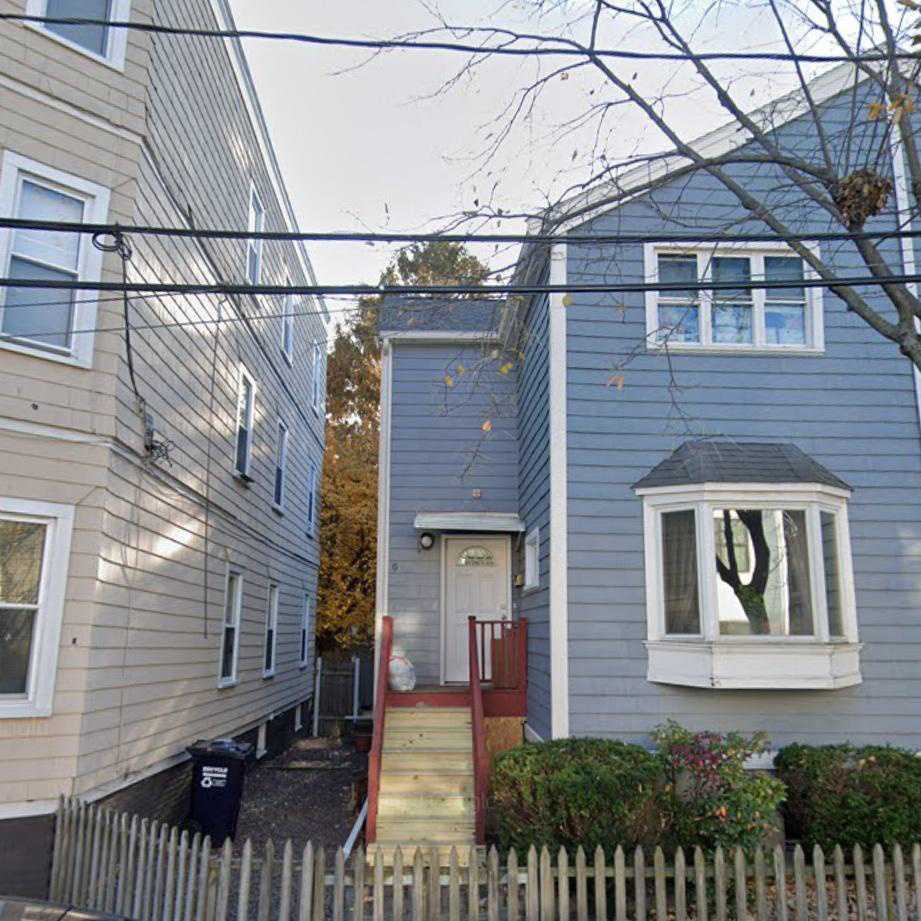

In [5]:
image = Image.open('/home/klimenko/seg_materials/FINAL_DATASETS/BROOKLYN/OUTPUTS2/RGB/0__91L6q8rkG9PiNpPRP6LzDA.jpg')

image

In [6]:
with torch.no_grad():
  outputs = model(**inputs)
preds = outputs.logits.unsqueeze(1)
resized_preds = F.interpolate(preds, size=(1000,1000), mode='bilinear', align_corners=False)
qwe = resized_preds[0,:,:,:]
tensor = resized_preds.squeeze(1)  
mask = torch.argmax(tensor, dim=0)
lookup_table = torch.tensor([10, 11, 12, 13, 13, 12, 12, 16, 16, 17, 17, 17])
mask = lookup_table[mask]
print(mask.shape)


torch.Size([1000, 1000])


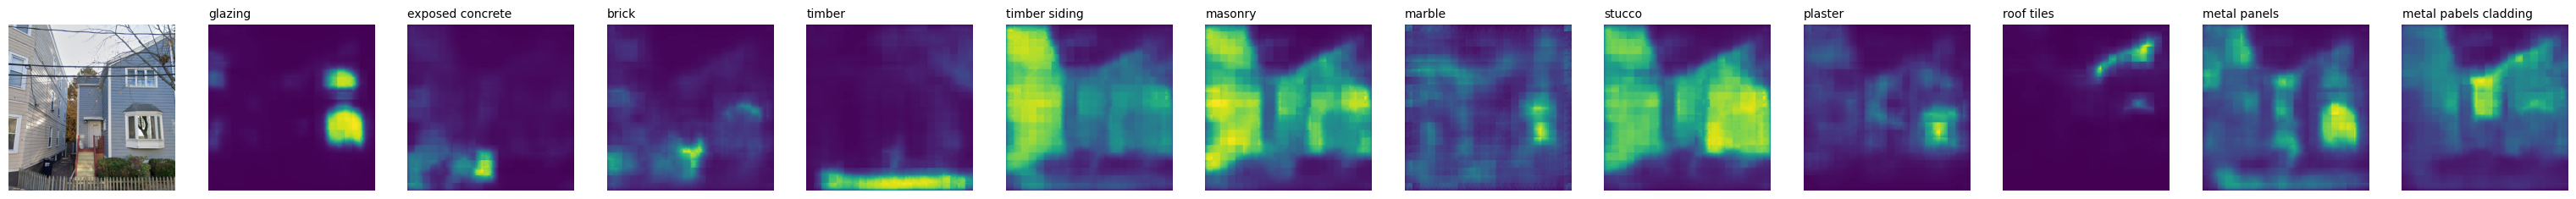

In [7]:

_, ax = plt.subplots(1, len(prompts) + 1, figsize=(3*(len(prompts) + 1), 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))];
[ax[i+1].text(0, -15, prompt) for i, prompt in enumerate(prompts)];

In [8]:
qw = np.load('/home/klimenko/seg_materials/FINAL_DATASETS/BROOKLYN/OUTPUTS5/CLIPSEG/Copy of 61D2aTY12NiYSjLgsG0bPA_180.npy')



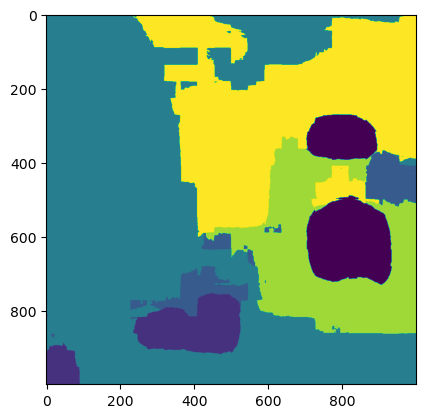

In [9]:
plt.imshow(mask)

In [14]:
RGB_PATH = '/home/klimenko/seg_materials/FINAL_DATASETS/COMBINED/OUTPUTS/RGB/'
OUT_PATH = '/home/klimenko/seg_materials/FINAL_DATASETS/COMBINED/OUTPUTS_RAW_CLIPSEG2/'
i = 0
for imagename in os.listdir(RGB_PATH):#[0:5]
    try:
    
        image = Image.open(RGB_PATH+imagename)
        inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

        with torch.no_grad():
          outputs = model(**inputs)
        preds = outputs.logits.unsqueeze(1)
        resized_preds = F.interpolate(preds, size=(1000,1000), mode='bilinear', align_corners=False)
        qwe = resized_preds[0,:,:,:]
        tensor = resized_preds.squeeze(1)  
        mask = torch.argmax(tensor, dim=0)
        lookup_table = torch.tensor([10, 11, 12, 13, 13, 12, 12, 16, 16, 17, 17, 17])
        mask = lookup_table[mask]

        np.save(OUT_PATH+imagename[:-4]+'.npy', mask)
        i = i+1
        print(i)
    except:
        print("EEE")
    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
EEE
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
